# Python notebook for Inverse problems Exercises and practicals

Malcolm Sambridge & Andrew Valentine - Research School of Earth Sciences, The Australian National University

In [1]:
# setup libraries for exercises and practicals
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import scipy.io as sio
import sys
import anu_inversion_course.rejectmethod as rj
import anu_inversion_course.eqlocate as eq
from anu_inversion_course.plotcovellipse import plot_point_cov,plot_cov_ellipse

<img src="../Figures/Slides/Pages from EMSC8023-B_2018-p13.png" alt="Slide" width="600"/>

In [2]:
x=np.linspace(1.0,10.,10) 
print(np.transpose([np.ones(len(x)),x,-0.5*x*x]))

[[  1.    1.   -0.5]
 [  1.    2.   -2. ]
 [  1.    3.   -4.5]
 [  1.    4.   -8. ]
 [  1.    5.  -12.5]
 [  1.    6.  -18. ]
 [  1.    7.  -24.5]
 [  1.    8.  -32. ]
 [  1.    9.  -40.5]
 [  1.   10.  -50. ]]


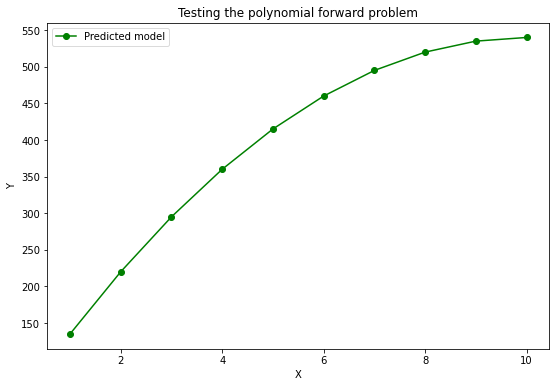

In [3]:
###############################
# The forward problem
#####################
x=np.linspace(1.0,10.,10) # build x
G=np.transpose([np.ones(len(x)),x,-0.5*x*x]) # Build G matrix
mguess=[40.0,100.,10.] 
ypredicted1=np.dot(G, mguess)

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x,ypredicted1,'go-',label='Predicted model')
plt.legend(loc='upper left',framealpha=0.7)
plt.title('Testing the polynomial forward problem')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

<img src="../Figures/Slides/Pages from EMSC8023-B_2018-p15.png" alt="Slide" width="600"/>

In [82]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

#######################
#  The inverse problem  
#######################



<img src="../Figures/Slides/Pages from EMSC8023-B_2018-p23.png" alt="Slide" width="600"/>

In [83]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

########################
#  Goodness of fit 
########################


<img src="../Figures/Slides/Pages from EMSC8023-B_2018-p24.png" alt="Slide" width="600"/>

In [84]:

# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

### With wrong data errors


<img src="../Figures/Slides/Pages from EMSC8023-B_2018-p30.png" alt="Slide" width="600"/>

In [85]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

###############################
# The model covariance matrix
###############################


<img src="../Figures/Slides/Pages from EMSC8023-B_2018-p32.png" alt="Slide" width="600"/>

In [86]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

# setup libraries for exercises and practicals


In [87]:
##########################
# Random draws of feasible solutions
##########################


<img src="../Figures/Slides/Pages from EMSC8023-B_2018-p33.png" alt="Slide" width="600"/>

In [88]:
# ----------------------------------------------------------------------------
# Calculate covariance matrix from error distribution for each pair of solution parameters
# using fake data
# ----------------------------------------------------------------------------


<img src="../Figures/Slides/Pages from EMSC8023-B_2018-p35.png" alt="Slide" width="600"/>

In [89]:
###########################
# Calculate and plot feasible curves
###########################



# Iterative data fitting in a nonlinear problem

<img src="../Figures/Slides/EMSC8023-B_2019-p49.png" alt="Slide" width="600"/>

Replicate the Earthquake location experiment on the previous slides by writing a python script to generate arrival times for a seismic source at (x,y,z,to) = (5.,5.,10.,1.). Use a homogeneous crustal Earth model with wave speed, v=5.4 km/s. 

    1. Generate 10 seismic stations at random locations on a +-30km box in (x,y) at the earth’s surface and calculate arrival times from the source to each station

    2. Form two data sets of arrival times, one noiseless and one with Gaussian noise added where  

    3. Determine expressions for each entry of the 10 x 4 Derivative matrix and build the G matrix. Build the data covariance matrix

    3. Choose a random starting guess inside the box and apply the least squares iterative solution to both the noisy and noiseless data sets. Decide how many iterations to let it run for.

    4. Make a plot showing the source location at each iteration for each case.

    5. Make a table of the residuals vs iteration for each case.

Does the iterative algorithm converge to a good enough solution? 
How many iterations does it take? What happens if you put the starting solution far from the actual earthquake location? 

In [90]:
###########################
# Iterative earthquake location example 
###########################




# Monte Carlo Method exercises

<img src="../Figures/Slides/Pages from EMSC8023-B_2018-p46.png" alt="Slide" width="600"/>

In [91]:
# Generate uniform pseudo random number
#######################
np.random.seed(61254557)
######################


<img src="../Figures/Slides/Pages from EMSC8023-B_2018-p47.png" alt="Slide" width="600"/>

In [92]:
###############################
# Generate normal random deviates
###############################


<img src="../Figures/Slides/Pages from EMSC8023-B_2018-p49.png" alt="Slide" width="600"/>

In [93]:
######################
# Generate 2-D pseudo random deviates 
######################


<img src="../Figures/Slides/Pages from EMSC8023-B_2018-p51.png" alt="Slide" width="600"/>

In [94]:
######################
# Transforming random variables
######################



<img src="../Figures/Slides/Pages from EMSC8023-B_2018-p53.png" alt="Slide" width="600"/>

In [95]:
####################
# Test the central limit theorem 
####################


<img src="../Figures/Slides/Pages from EMSC8023-B_2018-p63.png" alt="Slide" width="600"/>

# Earthquake location and uncertainty via Monte Carlo Error Propagation

In [5]:
############
#    Read in arrival times and use eqlocate to locate an earthquake. 
#############
with open('../Datasets/loctim.txt') as f:
    Lines=f.read().splitlines()  
     
la, lo, el, ts =[],[],[],[]

for i in range(len(Lines)):
    la.append(float(Lines[i].split()[0]))
    lo.append(float(Lines[i].split()[1]))
    el.append(float(Lines[i].split()[2]))
    ts.append(float(Lines[i].split()[3]))

la,lo,el,ts =np.array(la), np.array(lo), np.array(el), np.array(ts)

vp,tol=5.8, [0.01,0.01]

# load border.xy
border1, border2 =[], []

with open('../Datasets/border.xy') as f1:
    border=f1.read().splitlines()  
for i in range(len(border)):
    border1.append(float(border[i].split()[0]))
    border2.append(float(border[i].split()[1]))

border1=np.array(border1)
border2=np.array(border2)

######## Start guess for location
x0=9
y0=46.8
z0=-10
######## locate earthquake
sols, res =eq.eqlocate(x0,y0,z0,ts,la,lo,el,vp,tol)

numit = len(sols)
tfinal = sols[numit-1,0]
xfinal = sols[numit-1,1]
yfinal = sols[numit-1,2]
zfinal = sols[numit-1,3]

print ('Location', xfinal,yfinal,zfinal)
print ('Event time (seconds after 16:30)',tfinal)

plt.figure(figsize=(9,6))
plt.plot(border1,border2,'r-')
plt.scatter(lo,la,s=50,marker='^')
plt.plot(sols[:,1],sols[:,2],'o-y') # solution updates
plt.plot(sols[0,1],sols[0,2],'ok') # initial guess
plt.plot(xfinal,yfinal,'or')
plt.xlim([5.5,11])
plt.ylim([45.5,48])
plt.show()


TypeError: 'float' object is not subscriptable

<img src="../Figures/Slides/Pages from EMSC8023-B_2018-p65.png" alt="Slide" width="600"/>

In [97]:
##############
#    Then use Monte Carlo error propagation to calculate confidence ellipses
##############


In [98]:
###### Calculate covariance solutions


# Bootstrap methods for error propagation

Using the bootstrap on the mean of some data

<img src="../Figures/Slides/Pages from EMSC8023-B_2018-p73.png" alt="Slide" width="600"/>

In [99]:
#################
# Calculate the error in the mean estimator
#################
 

### Using the bootstrap to estimate the errors in earthquake location


<img src="../Figures/Slides/Pages from EMSC8023-B_2018-p75.png" alt="Slide" width="600"/>

In [100]:
#################
# Calculate Bootstrap error propagation
#################


# Extended practicals

Each of the following problems illustrate an example of parameter
estimation, Goodness of ft tests, Linear error propagation, Monte Carlo
error propagation, and Bayesian sampling. Each requires you to write
some computer code, or run code already written. We’ll focus on doing
them with Python, using the Jupyter server set up for the class.

## Practical problem 1. Fitting a curve to noisy data

Imagine that you have a parameter estimation problem where you wish to
fit the following function to some observations of
$x_i, y_i, (i=1\dots,N)$

$$ y(x) = \frac{1}{100}\left[ \frac{m_1}{5} + \frac{m_2}{5}x +\frac{m_3}{16}(x^2 + 1600\sin(\frac{x}{2\pi})) \right ]. $$

<img src="../Figures/Example-data-curve.png" alt="Example of test data for regression problem with true curve (blue). Here the $x$ values are generated uniformly randomly between 0 and 120, while the $y$ values are equal to the curve height plus a Gaussian random error with $\sigma_y = 0.75$, i.e. $y_{obs} = y_{true} + \epsilon$, where $\epsilon \sim N(0, \sigma_y^2)$." width="600"/>

Figure 1. Example of test data for regression problem with true curve (blue). Here the $x$ values are generated uniformly randomly between 0 and 120, while the $y$ values are equal to the curve height plus a Gaussian random error with $\sigma_y = 0.75$, i.e. $y_{obs} = y_{true} + \epsilon$, where $\epsilon \sim N(0, \sigma_y^2)$.

In Figure 1 I have used $m_1 = m_2 = m_3 = 1.0$ to generate the true curve.

### Tasks to complete:

**Task 1** 
Choose values for $(m_1, m_2, m_3)$ and generate 12 data similar to
    Figure 1 and plot them. To do this you should generate
    your x values uniformly randomly over the range (0,120) and then
    calculate $y$ values using the above expression. Add Gaussian random noise
    to your $y$ values with standard deviation, $\sigma_y,$ that you
    choose. Plot the true curve with the data similar to Figure1. This
    is the test data for your problem.

In [6]:
# Write your answer in here
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import anu_inversion_course.plotcovellipse as pc



**Task 2**  
We want to estimate the parameters $(m_1, m_2, m_3)$ from the
    observations. This problem can be written in vector form as
    ${\bf d} = G {\bf m}$. Describe what are ${\bf d}$, ${\bf m}$ and
    $G$ for this problem? What dimensions does the $G$ matrix have? Is
    this a linear or nonlinear parameter estimation problem? Calculate
    the $G$ matrix for this problem.


In [102]:
# Write your answer in here


**Task 3**  Use the $G$ matrix and your data to estimate a least squares
    solution for the parameters $(m_1,m_2,m_3)$. Calculate the curve
    that this solution predicts and plot it with the data with its
    errors and the true curve.

In [103]:
# Write your answer in here



**Task 4**  
Calculate the Chi-square value for this problem. Is this a good
        enough fit to data? Calculate the p-value for this goodness of
        fit. What do you conclude from the p-value?

Repeat the calculation with the noise error, $\sigma_y=0.25$.
        How would this change the Chi-square and p-value? What would you
        conclude in this case?

Repeat the calculation with the noise error, $\sigma_y=2.25$.
        How would this change the Chi-square and p-value? What would you
        conclude in this case?

In [104]:
# Write your answer in here

# ----------------------------------------------------------------------------
# Goodness of fit
# ----------------------------------------------------------------------------


In [105]:
# case B 


In [106]:
# case C


**Task 5** Calculate model covariance matrix for the problem and from this find
    the 95% confidence intervals for each parameter $m_1, m_2$ and
    $m_3$. Calculate the model correlation matrix. Do you see any
    significant trade-off in the model parameter errors? Plot the
    confidence ellipses for the $(m_1, m_2)$, $(m_2, m_3)$ and
    $(m_1, m_3)$ planes. How do any trade-offs you observed in the model
    covariance matrix manifest themselves in the plots of the covariance
    matrix?

In [107]:
# Write your answer in here
# ----------------------------------------------------------------------------
# Calculate and plot covariance matrix from error distribution for each pair of solution parameters
# ----------------------------------------------------------------------------


**Task 6** Generate 1000 feasible solutions for the model parameters and for
    each one generate and plot the predicted curves, with the data and
    the predicted curve from the least squares solution.

In [108]:
# Write your answer in here
# ----------------------------------------------------------------------------
# Plot random draws from model error distribution for each pair of solution parameters
# ----------------------------------------------------------------------------



**Task 7**  Repeat the calculation of the model covariance matrix and 95%
    Confidence intervals but with the assumption $\sigma_y = 0.25$. What
    do you notice about each these new error estimates? How would you
    rectify the situation to get reasonable model parameter errors?

In [109]:
# Write your answer in here
#Cm = GtGinv # Covariance matrix of solution errors


## Practical problem 2. Uncertainty estimation using Monte Carlo error propagation

Now repeat your uncertainty analysis of question 1 but instead use Monte
Carlo error propagation.

**Task 1**  Generate Gaussian random deviates with standard deviation
    $\sigma_y = 0.75$ as was assumed previously. Add these to your
    observed y values $y_{obs}$. Then use these new y values and fit the
    model in Figure 1 as many times as you think necessary. Make a 2-D scatter plots of pairs of parameters in the MC solutions and compare to the each covariance ellipses you plotted in Q1.5
    above.

In [110]:
# Write your answer in here
# ----------------------------------------------------------------------------
# Monte Carlo estimate of feasible solutions
# ----------------------------------------------------------------------------



**Task 2**  Plot the histogram of the Monte Carlo solutions for each parameter
    $m_1,m_2$ and $m_3$. How do they compare to the 95% confidence
    intervals calculated previously.

In [111]:
# Write your answer in here



**Task 3**  Calculate a model covariance matrix from the MC solutions and
    compare to the model covariance matrix values found in Q1.5 above.
    Plot ellipses for pairs of parameters, as before. How do these plots
    compare to the covariance ellipses you plotted in Q1.5 above?

In [112]:
# Write your answer in here


**Task 4**  Calculate 95% confidence intervals for each parameter using your MC
    estimated model covariance matrix. How do these results compare to
    the ones you obtained in Q1.5 above?

In [113]:
# Write your answer in here


## Practical problem 3. Error propagation with the Bootstrap: The cannonball problem

<img src="../Figures/ballistics.png" alt="Cannonball figure" width="600"/>
Figure 2. Cannonball heights as a function of time.

 cannon ball is fired directly upwards from an unknown starting height
above the surface, $m_1$, with unknown initial velocity, $m_2$ and
unknown gravitational acceleration, $m_3$ . Newton’s laws of motion tell
us that the relationship between position and time follows

$$y(t) = m_1 + m_2t -\frac{1}{2}m_3t^2.
\label{eq:cannon}$$

An experiment has been performed and heights, $y_i$, $(i=1,\dots,8)$ are
collected at fixed time intervals of a second. We obtain the data
$y = [26.94, 33.45, 40.72 , 42.32, 44.30 , 47.19 , 43.33 , 40.13 ]$,
$t = [1.0,2.0,\dots,8.0]$.

To find the unknowns $(m_1, m_2, m_3)$ we must fit a quadratic curve
(as above) to the observed data (see figure 2). This can be achieved
by solving the linear system ${\bf d} = G{\bf m}$, where ${\bf d}$ is
the data, ${\bf m}$ is the vector of unknowns and $G$ is the matrix
connecting the two, determined by the expression above. The solution to this is
in your course exercise, but is equivalent to evaluating the expression

$${\bf m} = (G^TG)^{-1} G^T {\bf d}
\label{eq:LS}$$

All terms on the right hand side of this equation are known and so
its a simple case of plugging in values to determine the best fit
estimates of $(m_1, m_2, m_3)$.

Calculate the best fit values of the three unknowns (height, velocity
and gravitational acceleration). We call these values
$(m_1^0, m_2^0, m_3^0)$ our <span>**solution**</span>. Can you guess
where this experiment took place?



In [114]:
# Write your answer in here



The problem now is to use the <span>**bootstrap**</span> to determine
how error in the data propagate into the estimated unknowns. We do not
know the size of errors in the data but we can apply the bootstrap.
Since the data are associated with increasing time it does not make
sense to directly resample the data (because we could end up with two
heights of the same value associated with different times). The data are
not IID, since they belong to a trend. However we can still proceed by
applying the bootstrap principle to the data residuals produced by the
best fit solution., i.e. we have 8 residuals, $r_i$, where

$$r_i = y_i - m^0_1 - m^0_2t_i +\frac{1}{2}m^0_3t_i^2.\quad (i=1,\dots, 8).$$

If we assume that the residuals are IID they can be re-sampled with
replacement in the usual way to form multiple sets of 8 residual values
$r^*_j, (j=1,\dots,8)$ and new bootstrap data are constructed using this
set of residuals by

$$y^*_j = r^*_j + m^0_1 + m^0_2t_j -\frac{1}{2}m^0_3t_j^2.\quad (j=1,\dots, 8).$$

Using this approach the residuals are mixed between different data, and
so each y values does not simply get its own residual back.

<span>**Write a python script**</span> to build bootstrap data sets and
for each of these insert them into the above expressions to calculate
the bootstrap estimates of the unknowns. Lets call these
$(m_1^i, m_2^i, m_3^i), (i=1,\dots, B)$. The number of bootstrap samples
$B$ is your choice but it should be at least 100.

It can be instructive to <span>**plot the bootstrap samples**</span> as
a scatter plot for the three pair of variables, i.e. $(m^i_1, m^i_2)$,
$(m^i_2, m^i_3)$ and $(m^i_1, m^i_3)$, $(i=1,\dots, B)$. They should
look something like Figure 3.

<img src="../Figures/bootstrap.png" alt="Bootstrap figure" width="400"/>
Figure 3. Bootstrap solutions and confidence ellipses distributed about the best fit solution.

In [115]:
# Write your answer in here




From the bootstrap output samples
$(m_1^i, m_2^i, m_3^i), (i=1,\dots, B)$ and the formulae in the course
slides, calculate the i) <span>**the mean**</span>, ii) <span>**the
variance**</span>, iii) <span>**the bias corrected solution**</span>,
and iv) <span>**the 95% confidence intervals**</span> for each of the
three unknowns . The mean should look similar to the best fit values and
the bias should be small. The variance and confidence intervals
characterize the error in the estimated values of the unknowns.

In [116]:
# Write your answer in here



## Practical problem 4.1 Parameter search with nested grids

Suppose we have two unknowns, $(x_1, x_2)$. We measure $x_1$ directly
and obtain a value of $1\pm\sigma$ (where the measurement error is
$\sigma=10$). Suppose also that we know the following property should
hold, $x^2_1 = x_2$. We wish to find the best compromise values of
$(x_1, x_2)$ which both fit the data and the extra constraint. We could
solve this problem by finding $(x_1, x_2)$ which minimizes the least
squares misfit function

$$f(x_1, x_2) = \frac{(1-x_1)^2}{100} + (x_2-x_1^2)^2.$$

This is hardly necessary because the solution is fairly obvious, i.e.
$x_1 = x_2 = 1$, and indeed this solution corresponds to a global
minimum in the misfit function $f(1,1) = 0$. The misfit surface is
plotted in figure 4 and is known as the Rosenbrock function[^1].
Although its global minimum is known it can be quite difficult to locate
with an optimization algorithm (because it lies at the end of a long
valley).



<img src="../Figures/rosenbrock.png" alt="Bootstrap figure" width="400"/>
Figure 4. The Rosenbrock misfit function for a two parameter problem.

### Tasks to complete:
**Task 1**  Find the global minimum of this function using simple uniform Monte
    Carlo random search. <span>**Write a python script**</span> to
    generate random points in a plane in the ranges
    $-1.5 \le x_1 \le 1.5$, and $-1.5 \le x_2 \le 1.5$. Calculate
    $f(x_1, x_2)$ for each of your points and plot the minimum as a
    function of the number of points tested. How many do you need to
    generate to get a good solution? It can be instructive to plot the
    minimum in $f(x_1, x_2)$ as a function of the number of points that you
    generate.


In [117]:
# Write your answer in here



**Task 2**  Now repeat the exercise but stop the process after a fixed number of
    samples, say $N_s$ (you choose $N_s$). Then centre a new smaller box
    with side length $L$ (you choose $L$, e.g. 1/2 or 3/4 of the length
    of the original) at your current best solution and repeat the
    process. You have built a <span>**nested grid parameter search
    scheme**</span>. Repeat this several times and see if the solution
    is more accurate and the convergence any quicker than with the
    single stage approach.


In [118]:
# Write your answer in here



**Task 3**  
If you want a challenge then repeat the problem with multiple
    unknowns and data. The $N$ variable Rosenbrock function is

$$f(x_1, x_2,\dots,x_N) = \sum_{i=1}^{N-1}(1-x_i)^2 + 100(x_{i+1}-x^2_i)^2.$$

But beware this function has local minima as well as a global
    minimum.


## Practical problem 4.2 Fully nonlinear inversion of a seismic receiver function

'Receiver functions' are a class of seismic data used to study discontinuities (layering) in the Earth's crust. At each discontinuity, P-to-S conversions occur, introducing complexity in the waveform. By deconvolving horizontal- and vertical-channel waveforms from earthquakes at teleseismic distances, we can isolate information about these conversions, and hence learn about the crustal structure. This deconvolved signal is the receiver function, and has a highly non-linear dependence on the local crustal properties.

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from anu_inversion_course import rf


The function `rf.rfcalc()` computes synthetic receiver functions (using routines developed by Takuo Shibutani). It is called as follows:
```python
t,rfunc = rf.rfcalc(model)
```
where `model` is a NumPy array of dimension `[nlayers,3]`. The values in `model[:,0]` give the depths of discontinuities in the model, while `model[:,1]` contains the S-wave speed above the interface. `model[:,2]` is the ratio of S-wave speed to P-wave speed. The maximum depth of discontinuity that can be considered is 60km.

For example, here is the Earth model.

In [8]:
model = np.array([[1,4.0,1.7],
                  [3.5,4.3,1.7],
                  [8.0,4.2,2.0],
                  [20, 6,1.7],
                  [45,6.2,1.7]])

Lets plot the Earth model

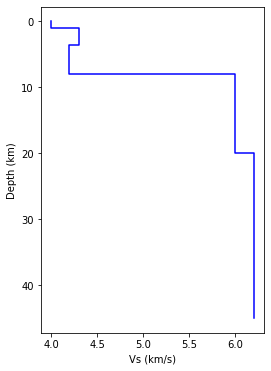

In [9]:
px = np.zeros([2*len(model),2])
py = np.zeros([2*len(model),2])
n=len(model)
px[0::2,0],px[1::2,0],px[1::2,1],px[2::2,1] = model[:,1],model[:,1],model[:,0],model[:-1,0]
plt.figure(figsize=(4,6))
plt.xlabel('Vs (km/s)')
plt.ylabel('Depth (km)')
plt.gca().invert_yaxis()
plt.plot(px[:,0],px[:,1],'b-')
plt.show()

Now we calculate the receiver function and plot it.

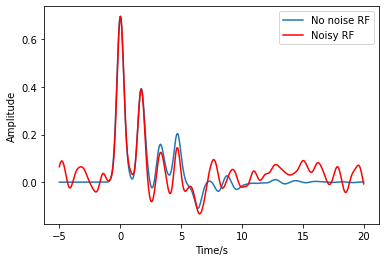

In [10]:
# calculate and plot receiver function
t,rfunc = rf.rfcalc(model)          # Receiver function
t2,rfunc2 = rf.rfcalc(model,sn=0.5) # Receiver function with added correlated noise
plt.plot(t,rfunc,label='No noise RF')
plt.plot(t2,rfunc2,'r-',label='Noisy RF')
plt.xlabel('Time/s')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

**Task 1:** Familiarise yourself with the function `rf.rfcalc()` and explore how the receiver function behaves as you change the model.

In [123]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

# calculate and plot receiver function with different parameters



**Task 2:** Invent a model with around 5 layers, plot it and then compute the corresponding receiver function with the noise parameter $sn$ set to some reasonable value, say $sn=0.5$. Plot the noisy and noiseless receiver functions together just as in the figure above. We are going to treat the noisy receiver function as data.

To measure the fit of this observed receiver function to the receiver function predicted by any other model, ${\mathbf d}_{pred}$, we need to compute the negative log of the Likelihood

\begin{equation*}
-\log (p({\mathbf d}_{obs} | {\mathbf m}) = ({\mathbf d}_{obs}-{\mathbf d}_{pred})^T C_D^{-1} ({\mathbf d}_{obs}-{\mathbf d}_{pred})
\end{equation*}

where $C_D^{-1}$ is the inverse data covariance matrix describing correlated noise in the receiver function. You can do this using the supplied routine InvDataCov($\sigma_t$,$\sigma_a$,$n$), which builds an $nxn$ inverse data covariance matrix for a time signal with amplitude variance $\sigma_a^2$ and time correlation length $\sigma_t$, for receiver length of $n$ time samples. In this example you can use $\sigma_t = 2.5$, $\sigma_a=0.01$. Compute the negative log Likelihood between the noisy data and the predicted receiver function of the true model. 

In [124]:
# generate new Earth model and plot it with receiver function



In [125]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

Cdinv = rf.InvDataCov(2.5,0.01,len(rfunc))
# now compute the negative log Likelihood between the receiver functions of your two models.

# Calculate waveform misfit between noisy and noiseless receiver functions


**Task 3:** Now we're going to assume that we know everything about the model, except for the depth of one interface. Select one interface in your model which you will pretend is 'unknown', and plot how the agreement between 'data' and synthetics varies with this unknown. Choose ranges for each variable something like the following $(0,60 km)$ for a depth variable. Try and plot the negative log-Likelihood as a function of the depth variable. Is the minimum where you expected it to be? Does your plot give you the impression that this problem is highly nonlinear?

In [126]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

# Calculate misfit as a function of depth of a chosen layer


**Task 4:** Explore what happens if the unknown parameter is $V_s$ in the layer, or its $V_p/V_s$ ratio, and its depth is known. Choose ranges for each variable something like $\pm 1.0 km/s$ for a $V_s$ variable or $\pm 0.5$ for $V_s/V_p$. 

In [127]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 




**Task 5:** Now, suppose we have two unknown parameters - the interface depth and associated $V_s$, perhaps, or two depth parameters. Map out how the agreement between 'data' and predicted receiver function varies as you change both parameters. Plot a contour map of this data misfit surface? How multi-modal is this?


In [128]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



**Task 6:** Now choose to search this 2-D space with either a (nested) grid search in a square or a (nested) Gaussian sampler. In each case you must choose the density of the sampling, adjust the centre of the sampling in each iteration and record the progress toward finding the best fit solution. How close do you get to the known true values? How does the distance between the best fit solution and the true solution change with numbers of random samples? Try and plot this.

In [129]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 


**Task 7:** What do you think would happen if you repeat this process and increase the number of unknown parameters in your inversion?

In [130]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



## Practical problem 5.1  Applying Bayesian inference to the biased coin problem

In this practical, we will perform Bayesian inference for a single parameter, constrained by some obervational data, and examine how the posterior knowledge of the parameter changes as we collect new data.

If $\alpha$ is the probability that a head will occur when a coin is tossed, then a biased  coin is described by a value $\alpha \ne 0.5$. We have $0\le \alpha \le 1$, where a value of $\alpha=1$ means a head will always be the result of a coin toss and if $\alpha=0$ a tail will always result.
 
As in every Python program, we need to begin by loading some libraries. For Jupyter we also need the `%matplotlib inline` command, which ensures that figures are rendered properly within the Notebook. This could be omitted if you wanted to reproduce this practical as a 'standard' Python program.



In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Now we read in the coin toss data as ones for heads and zeros for tails.

In [12]:
#initialise the list of coin flip results
tosses = open('../Datasets/coin_data1-numeric.txt','r')
tosses = tosses.readlines()
tosses = np.array([int(flip) for flip in tosses])

The Binomial theorem tells us the probability that there are $R$ heads in $N$ coin tosses for a coin where the the probability of a head is $\alpha$ is given by

\begin{equation*}
p(R|\alpha,N) = \frac{N!}{R!(N-R)!} \alpha^R (1-\alpha)^{N-R}
\end{equation*}

**Task 1:** Decide on an appropriate Likelihood function to use the observed value of $R$ to constrain the unknown $\alpha$ and write it down, $p(R | \alpha)$. Assuming we have no particular prior preference for $\alpha$ decide on a prior PDF, $p(\alpha)$. From these determine the form of the posterior PDF, $p(\alpha | R)$ and write these down. Remember you only need to know the posterior PDF up to a multiplicative constant, ignoring normalization terms that do not depend on $\alpha$.

**Task 2:** Use the coin toss data to calculate the poster PDF, $p(\alpha | R(N))$ for $N=1, 2, 3, 4, 8, 64, 1024$, and plot the PDF for each case. What do you conclude about the true value of $\alpha$?

Hint: In any computer program it is always best to calculate log p(njd)
first and then take an exponent to evaluate the curve as a function
of n. Stirling’s formulae for the approximation to n! may be useful.

In [133]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 
#
#In any computer program it is always best to calculate log p(njd)
#first and then take an exponent to evaluate the curve as a function
#of n. Stirling’s formulae for the approximation to n! may be useful.


**Task 3:** Now calculate an estimate of $\alpha$ for each case using a Frequentist approach. Decide on what a good estimator of $\alpha$ would be given $R$ and $N$. Calculate this estimator for each case and place on the same figure. How well does it compare to the Posterior PDF?

In [134]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 
#


**Task 4:** More formally a good Frequentist estimator is the maximum of the Likelihood. You can get an expression of the maximum Likelihood value for $\alpha$, by finding $\alpha$ such that $\frac{d L}{d\alpha} = 0$, where $L$ is your Likelihood expression. Try and differentiate your expression for the Likelihood and solve this equation for $\alpha$. How does this expression compare to your estimator you produced in Task 3.

Theory tells us that an estimated error in the Frequentist estimator is given by $\sigma = \left( \frac{d^2 L_o}{d \alpha^2}\right)^{1/2}$, where $L_o = -\log L$, the negative log-Likelihood. Calculate this error estimate for the Frequentist estimator and put on the figures above. How does the estimator and its error compare to the Posterior PDF for each case?

In [135]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 
#



**Task 5:** Repeat the above steps for the second data set. Do you notice a difference in the rate of convergence of the posterior PDF to the true solution? Why would this be?

In [13]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 
#

#initialise the list of coin flip results
tosses = open('../Datasets/coin_data2-numeric.txt','r')
tosses = tosses.readlines()
tosses = np.array([int(flip) for flip in tosses])

## Practical problem 5.2  Applying Bayesian inference to a lottery

In this example we will compare Bayesian and Frequentist approaches to using published data to estimate the number of tickets sold in a national lottery. The single unknown in the problem is the total number of entries (i.e. sets of 6 numbers) sold, which we will call $n$. The data is the number of
winning entries of each division $d_i, (i=1,\dots,N_{div}) $, where $N_{div}$ is
6 for the example below. These are given without error. Of
course, since both the cost per entry and the total prize money are
published then an estimate of $n$, allows a direct inference on the
total profit before costs made by the lotto organisation. (In reality
the real value of $n$ is never made public!)

We will look at the problem both from a Frequentist viewpoint, using the
data to make a single estimate of $n$, and also a Bayesian inference
viewpoint where we use the data to construct a probability distribution
for $n$.

### Background theory

The probability of winning each division, is independent of the total
number of entries $n$, so these may be treated as a set of known
constants, $p_i, (i=1,\dots, N_{div})$, the value of which depends on
the details of the game. 

<img src="../Figures/table.png" alt="Bootstrap figure" width="600"/>

Table 1. $p_i$ is the probability of winning division $i$ and $d_i$ are the number of actual winners in division $i$. Australian Tattslotto dividend results for draw number 3253 on 29/09/2012. Total prize pool of \$49.92m, with division 1 prize of \$22m. The cost of a single entry is about \$0.65.

### Tasks to complete:
**Task 1**  A Frequentist solution might be to take the number of winners of
    each division and divide by the probability of winning to get
    multiple estimates of $n$. These estimates are independent and we
    could average them. Do this for the data above to get an estimate
    for $n$. By how much do these estimates vary ?

In [137]:
# Write your answer in here

ds = [14.,169.,3059.,149721.,369543.,802016.]
pm1s = [8145060.,678756.,36696.,732.,300.,144.]



**Task 2**  
A Bayesian inference approach requires us to find the Likelihood and
    prior and then multiply them together. Lets assume our prior is
    uniform between $1< n < 3\times 10^8$ which is a safe assumption.
    The likelihood is the probability of the data given the model, i.e.
    the probability that there would be $d_i$ winners of division $i$
    and $n - d_i$ non winners when there are $n$ tickets sold. The
    binomial theorem tells us that this probability, $p(d_i | n)$, is
    given by
$$p(d_i | n) = \frac{n!}{d_i! (n-d_i)!} \times p_i^{d_i} (1-p_i)^{n-d_i}$$

All values in this expression are known except the value of
    $n$. Since the number of winners in each division provides
    independent data, the total likelihood is the product of similar
    terms for each division, i.e.   
$$p({\bf d}| n) =\prod_{i=1}^{N_{div}} p(d_i | n)$$

Bayes’ theorem says that to find the <span>*a posteriori*</span>
    probability distribution for the unknown $n$ we just multiply the
    likelihood by the prior. Since the prior is a constant the result is
$$p(n | {\bf d}) \propto  \prod_{i=1}^{N_{div}} \frac{n!}{(n-d_i)!} \times (1-p_i)^{n-d_i}
       $$

which holds for $1 \le n \le 3\times 10^8$. Outside this range the
    posterior PDF is zero because the prior is zero. Our only interest
    is in the unknown $n$ and so the constant of proportionality is used
    to absorb all quantities independent of $n$.

Your task is to use the values of $(d_i, p_i), i=1,\dots, 6$ from
    the table and plot the posterior probability distribution as a function of
    $n$. Do this in the range 112.5m - 114.5m. Did you get the type of figure that you expected? 
    Compare this curve to the single frequentist estimate of $n$ you obtained in part 1, what do you
    notice?
    
[Hint: In any computer program it is always best to calculate $\log p(n | {\bf d})$ first and then take an exponent to evaluate the curve as a function of $n$. Stirling's formulae for the approximation to $n!$ may be useful.]


In [138]:
# Write your answer in here
import math as mt


**Task 3**  
Repeat the problem using the Maximum Likelihood (ML) approach. This
    is done by finding the value of $n$ which maximises the 
    likelihood. Since the prior is a
    constant for this problem the likelihood is proportional to the
    curve you produced in part 2. You could probably do it visually.
    Plot the average estimate you obtained in part 1 on top of the curve
    from part 2. How does the ML solution compare to the Bayesian solution and the Frequentist solution?


In [139]:
# Write your answer in here



## Pracitcal problem 5.3: Probabilistic sampling for mixture of Gaussian PDFs

**Task 1:**
In this example we will define a target PDF to be a mixture of three Gaussians

$$p(x,y) \propto \sum_{i=1}^3w_i \exp\left\{ -0.5 (\bar {\mathbf x}_i - {\mathbf x})^TC_i^{-1} (\bar {\mathbf x}_i - {\mathbf x})\right\}  $$

where the means, covariances and weights of the three distributions are given by, $\bar {\mathbf x}_1 = (0.6,0.6), \bar {\mathbf x}_2 = (0.8,0.2), \bar {\mathbf x}_3 = (0.2,0.3)$; $C_1 = 0.02I, C_2 = \left(\begin{array}
 0.1 & 0.08\\
0.08 & 0.1
\end{array}\right), C_3 = \left(\begin{array}
 0.1 & -0.06\\
-0.06 & 0.1
\end{array}\right) $, and $w_1 = 0.1, w_2 = 0.4, w_3 = 0.5$, respectively.

Your first task to write a function to evaluate this PDF and then contour it over the region $0<= x,y <= 1)$

In [140]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



**Task 2:** 
Write a simple McMC sampler to sample the target PDF . 


You could do this by implementing the following simple algorithm:
- Step 0. Generate a  starting point for a random walk ${\mathbf x} = (x_1,y_1)$ and calculate the value of the PDF $p( {\mathbf x}) $.
- Step 1. Generate a new position ${\mathbf x}^{\prime}$ as a random draw from a symmetric proposal distribution,
$q({\mathbf x}^{\prime}|{\mathbf x}) $. There is flexibility in choosing the form of this proposal distribution. 
Try using $q({\mathbf x}^{\prime}|{\mathbf x}) = N({\mathbf x}, \sigma^2I$), where $\sigma$ is some distance you choose, e.g. $\sigma=0.05$.
- Step 2. Evaluate the target PDF at the proposed location $p({\mathbf x}^{\prime})$.
- Step 3. Generate $r$ as a random draw from $U[0,1]$. If $r < \frac{p({\mathbf x}^{\prime})}{p({\mathbf x})}$ accept the random step by setting ${\mathbf x} = {\mathbf x}^{\prime}$; Otherwise discard ${\mathbf x}^{\prime}$.
- Step 4. Record ${\mathbf x}$ as an entry of your output ensemble and go to 1.

Use your Metropolis sampler to generate an ensemble of $N$ points, where you choose $N$, and compare them to a contour plot of the target PDF, $p({\mathbf x})$. Does the density of samples reflect the target distribution?

**Task 3** Compare your samples to the original by plotting 1-D and 2-D marginal distributions for $x$ and $y$. You may find using the seaborn library very useful for this task.

In [141]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

import seaborn as sns; 
sns.set(style="white",color_codes=True)

# you can use seaborn.jointplot to plot density of samples together with marginals


Change the proposal distribution by increasing or decreasing $\sigma$. What do you notice?

In [142]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



In [143]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 


## Pracitcal problem 5.4: Probabilistic sampling for a seismic Earth model

'Receiver functions' are a class of seismic data used to study discontinuities (layering) in the Earth's crust. At each discontinuity, P-to-S conversions occur, introducing complexity in the waveform. By deconvolving horizontal- and vertical-channel waveforms from earthquakes at teleseismic distances, we can isolate information about these conversions, and hence learn about the crustal structure. This deconvolved signal is the receiver function, and has a highly non-linear dependence on the local crustal properties.

In [15]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from anu_inversion_course import rf
import anu_inversion_course.plotcovellipse as pc

The function `rf.rfcalc()` computes synthetic receiver functions (using routines developed by Dr. Takuo Shibutani). It is called as follows:
```python
t,rfunc = rf.rfcalc(model)
```
where `model` is a NumPy array of dimension `[nlayers,3]`. The values in `model[:,0]` give the depths of discontinuities in the model, while `model[:,1]` contains the S-wave speed above the interface. `model[:,2]` is the ratio of S-wave speed to P-wave speed. The maximum depth of discontinuity that can be considered is 60km.

For example, here is the Earth model.

In [16]:
model = np.array([[1,4.0,1.7],
                  [3.5,4.3,1.7],
                  [8.0,4.2,2.0],
                  [20, 6,1.7],
                  [45,6.2,1.7]])

Lets plot the Earth model

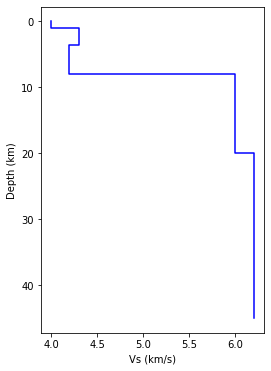

In [17]:
px = np.zeros([2*len(model),2])
py = np.zeros([2*len(model),2])
n=len(model)
px[0::2,0],px[1::2,0],px[1::2,1],px[2::2,1] = model[:,1],model[:,1],model[:,0],model[:-1,0]
plt.figure(figsize=(4,6))
plt.xlabel('Vs (km/s)')
plt.ylabel('Depth (km)')
plt.gca().invert_yaxis()
plt.plot(px[:,0],px[:,1],'b-')
plt.show()

Now we calculate the receiver function and plot it.

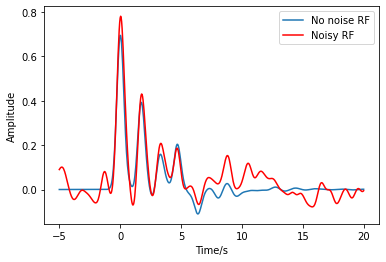

In [18]:
# calculate and plot receiver function
t,RFp = rf.rfcalc(model)          # Receiver function
t2,RFo = rf.rfcalc(model,sn=0.5) # Receiver function with added correlated noise
plt.plot(t,RFp,label='No noise RF')
plt.plot(t2,RFo,'r-',label='Noisy RF')
plt.xlabel('Time/s')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

**Task 1:** Familiarise yourself with the function `rf.rfcalc()` and explore how the receiver function behaves as you change the model.

**Task 2:** Invent a model with around 5 layers, plot it and then compute the corresponding receiver function with the noise parameter $sn$ set to some reasonable value, say $sn=0.5$. Plot the noisy and noiseless receiver functions together just as in the figure above. We are going to treat the noisy receiver function as data.


In [19]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

# generate new Earth model and plot it with receiver function


**Task 3:** To measure the fit of the observed and calculationed Receiver function we specify a Likelihood function $p({\mathbf d}_{obs}| {\mathbf m})$ 

\begin{equation*}
p({\mathbf d}_{obs} | {\mathbf m}) \propto \exp \left\{- \frac{1}{2} ({\mathbf d}_{obs}-{\mathbf d}_{pred}({\mathbf m}))^T C_D^{-1} ({\mathbf d}_{obs}-{\mathbf d}_{pred}({\mathbf m})) \right\}
\end{equation*}

where ${\mathbf d}_{obs}$ is the observed receiver function and ${\mathbf d}_{pred}({\mathbf m})$ is the one predicted by model $({\mathbf m})$. Teh Likelihood is defined as the probability of observing the data actually observed, given an Earth model.

In practice we usually need to evaluate the negative log of the Likelihood
which involves the inverse data covariance matrix describing correlated noise in the receiver function, $C_D^{-1}$ . For this problem you can evaluate $C_D^{-1}$ using the supplied routine InvDataCov($\sigma_t$,$\sigma_a$,$n$), which builds an $nxn$ inverse data covariance matrix for a time signal with amplitude variance $\sigma_a^2$ and time correlation length $\sigma_t$, for receiver length of $n$ time samples. In this example you can use $\sigma_t = 2.5$, $\sigma_a=0.01$. 

In this example we will also temper the Likelihood by rescaling the data covariance matrix by a temperature value, $T$, i.e. use $C_D^{-1}/T$ as the data covariance matrix in all calculations. This effectively reduces the size of `peakiness' of the posterior PDF to a simpler more manageable distribution. For this example set $T=100$.

Write a routine to compute the Likelihood of any test model using the above expression tempered by $T$.

In [149]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 


**Task 4:** Select two interface depth parameters in your model, i.e. 2 amd 3 would be a good pair. We will now pretend that the true depths of these two interfaces in the Earth model are 'unknown'. We will use McMC to try and sample the 2-D multi-modal PDF for these eparameters.

Choose a reasonable prior $p({\mathbf m})$ for this problem that you can generate samples from. A simple one might be uniform between fixed bounds. 

Suitable ranges for each variable would be $(0,60km)$ for an interface depth, $\pm 1.0 km/s$ for a $V_s$ variable and $\pm 0.5$ for $V_s/V_p$. 

Write a simple McMC sampler to determine the posterior distribution over these two parameters. 

You could do this by implementing the following simple algorithm:
- Step 0. Generate a  set of depths for your two interfaces ${\mathbf m} = (z_1,z_2)$ and calculate the Likelihood $L = p({\mathbf d}_{obs} | {\mathbf m}) $
- Step 1. Generate a new proposed model ${\mathbf m}^{\prime}$ as a random draw from the prior, and calculate its Likelihood, $L^{\prime}=p({\mathbf d}_{obs} | {\mathbf m}^{\prime}) $.
- Step 2. Generate $r$ as a random draw from $U[0,1]$. If $r < \frac{L^{\prime}}{L}$ set ${\mathbf m} = {\mathbf m}^{\prime}$.
- Step 3. Record ${\mathbf m}$ as an entry of your output ensemble and go to 1.

To do this you are advise to write routines to evaluate the Likelihood for a given model and data; and to draw a model from the prior.

To run your McMC sampler you will need to choose the length of the McMC chain. perhaps 100 for testing and at least $10^4$ for a reasonable run. Calculate and print out the percentage of accepted steps in the McMC chain. This number measured how efficient your chain is in drawing samples from the posterior PDF. It depends on the complexity of the target PDF. Ideally we would like values around 20%, but can live with > 5%. The lower it is the fewer useful samples you will have in the output chain and the more likely you will have to thin the output chain before calculating properties of your ensemble.

In [150]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



**Task 5:** Adjust your Markov chain until you are satsified that it has converged and use the output to select an ensemble of samples that you feel are reasonably distributed according to the posterior PDF for your two variables.
You may need to thin out the ensemble by subsampling. 

Plot the density of your McMC samples as a function of the two interface depths together with 1-D marginals for each interface. Compare these to a contour plot of the posterior distribution over the 2D model space.

In [151]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 


**Task 6:** Calculate the MAP and mean models of the posterior ensemble.

In [152]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



**Task 7:** Calculate the posterior model covariance matrix and standard devistions of each depth parameter from this ensemble.

In [153]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 


**Task 8:** Plot the 68% and 95 Credible ellipses for this posterior model covariance matrix and compare to the density plot you obtained in task4.

In [154]:
# plot credible intervals from posterior ensemble




Some further things to think about with your results
- What fraction of your proposed samples are accepted?
- How does the level of noise assumed in the Likelihood function impact results? You can test this by repeating with a different data covariance matrix. Can you explain the features that you observe?
- How many samples do you need to generate to get good results? Is your Markov chain stable (i.e., do two different portions of your chain share the same distribution)?

## Pracitcal problem 6. Bayesian inference for Regression

Suppose we have a 2-D data set of noisy $(x,y)$ values and have no idea
about the underlying function which produced it (Figure 6). The task is
to recover information about the (red) function from the observations.
In this exercise you can do this without fixing the complexity
(polynomial order) of the curve in advance. Instead the data is used to
constrain the number of degrees of freedom in the curve using
(transdimensional) Bayesian sampling.

<img src="../Figures/rjmcmc_single/ch0-exampledata.png" alt="RJMCMC figure" width="400"/>
Figure 5. 2-D data set. Red curve is the true function, dots are the observed data.

This exercise makes use of Bayesian Markov chain Monte Carlo sampling
software contained in the <span>*ilab*</span> inversion software
library. The library is available as Fortran or C source code with a
python interface. A PDF tutorial to the python routines is available and called
<span>*tutorial_single.pdf*</span>
[available here](files/Figures/tutorial_single.pdf).
The tutorial can be used as a guide to carry out the
following exercises with detailed descriptions of what each component does. Here you can either try and write python scripts
yourself to carry out the exercises below, or just load the solutions written in the tutorial,
run them and examine what they do.

The task is to estimate the red curve, as well as its uncertainty using
the Partition Modelling algorithm. This is
implemented in the python software library <span>*rjmcmc*</span>.

For this tutorial we will use a non-trivial (in the sense that it will
require a higher order polynomial to fit the function correctly) synthetic
dataset with added noise.
The function that is used is an exponentially increasing sine wave
over the domain 0 . . . 10, i.e.

$$y = e^{x/3} \sin \frac{2x}{3}$$

Lets assume that the errors are independent and only in the
y-co-ordinate and have a Gaussian distribution, with variance
$\sigma_i^2$. If the data are $y_i, (i=1,\dots, n)$ and the model
predictions at the same locations are $y_i, (i=1,\dots, n)$, then the
Likelihood function which measures the success of the model in fitting
the data is given by

$$p({\bf d} | {\bf m}) = \frac{1}{(2\pi)^{n/2}\prod_{i=1}^n \sigma_i} e ^{-\sum_{i=1}^n [y^{obs}_i - y_i({\bf m})]^2/\sigma_i^2}.$$

### Tasks to complete:

**Task 1**.  First load the given data set of $(x^{obs}_i, y^{obs}_i)$ values and
    plot the data. You should see a figure similar to the one above.


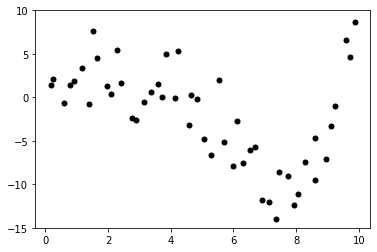

In [20]:
# Write your answer in here
#
# Open our data file which consists of one (x, y) coordinater per line
# separated by whitespace
#
f = open('../Datasets/rjmcmc_single_data.txt', 'r')
lines = f.readlines()

x = []
y = []

for line in lines:
    columns = line.split()

    x.append(float(columns[0]))
    y.append(float(columns[1]))

f.close()

# plot the data
fig = plt.figure()
plt.plot(x, y, 'ko',markersize=5)
plt.ylim(-15,10)
plt.show()


**Task 2**. In this exercise we assume a polynomial representation for the
    unknown function (red curve) with maximum order 5 and a uniform
    prior PDF.


For performing a regression analysis on a continuous dataset the
function is called <span> *regression_single1d </span>. The parameters for this
function are as follows with default values shown where applicable:

dataset The dataset object to run the analysis on. This is an rjmcmc.
dataset1d object which wraps the x and y vectors you load
from the file and includes individual point noise values. This is the
only parameter which doesn’t have a default value.

burnin = 10000 The number of initial samples to throw away.

total = 50000 The total number of samples to use for the analysis.

max_order = 5 The maximum order of polynomial to use to fit the
data.

xsamples = 100 The number of points to sample along the x direction
for the curve.

ysamples = 100 The number of points to sample along the y directory
for the statistics such as mode, median and confidence intervals.
This is the number of bins for the histograms in the y direction.

confidence_interval = 0.95 The confidence interval to use for minimum
and maximum confidence intervals. This should be a value
between 0 and 1.
single partition regression analysis 3

For this analysis we are only going to use the default values

Use the 1-D Partition modelling software to generate
    50000 curves and take the mean. It should look like the figure below.



<img src="../Figures/rjmcmc_single/ch2-analyse.png" alt="RJMCMC figure" width="400"/>
Figure 6. 2-D data set with mean reconstructed model from 50000 McMC samples.

In [156]:
import rjmcmc 

#
# Estimate our error standard deviation
#
sigma = 3.0
n = [sigma] * len(x)

#
# Create the rjmcmc dataset
#
data = rjmcmc.dataset1d(x, y, n)

# Write your answer in here


ImportError: No module named 'rjmcmc'



**Task 3**  
In this example the maximum order of the polynomial has been fixed
    at 5. Adjust the
    maximum order between 0 and 5 and plot the posterior distribution of
    the order. Plot the two figures showing the mean predicted curve
    for each case and the posterior PDF on the order of the
    polynomial, as below. The shows how the data support has detected
    the degree of the polynomial.
    
 <img src="../Figures/rjmcmc_single/ch3-orderanalysis.png" alt="RJMCMC figure" width="400"/>
 <img src="../Figures/rjmcmc_single/ch3-orderanalysishist.png" alt="RJMCMC figure" width="400"/>
Figure {a) (Upper panel) Mean models for 6 separate McMC runs with different maximum order of polynomial, 0 to 5; b) (Lower panel) Posterior probability distribution showing the support of the data for different polynomial orders as a function of maximum order.   

In [ ]:
# Write your answer in here
from mpl_toolkits.mplot3d import Axes3D

# Run a series of analyses with varying maximum allowed order
#


In [ ]:
#
# Plot a 3D bar chart showing the progression of the order histogram
# as the analysis maximum order is increased.
#


**Task 4** 
Repeat the run with maximum order 5 to generate an ensemble of
    solutions, just as in exercise 2 above, only this time use the
    library routines to plot a density model of the entire ensemble. In
    this way we get a visual impression of the error in the predicted
    curve. You can use script Use script <span>ch4-confidence.py</span>
    to do this and you should get a plot similar to Figure 8.
    
<img src="../Figures/rjmcmc_single/ch4-confidence.png" alt="RJMCMC figure" width="400"/>
Figure  Grayscale image of probability density of all curves in the ensemble when assuming maximum polynomial order equal to 5

In [ ]:
# Write your answer in here
#
# This is a callback function which can be passed to rjmcmc routines to sample the curves generated 
# during the analysis
#
sample_x = None
sample_curves = []
sample_i = 0
sample_rate = 5
def sampler_cb(x, y):
    global sample_x, sample_curves, sample_i, sample_rate

    if sample_i == 0:
        sample_x = x

    if sample_i % sample_rate == 0:
        sample_curves.append(y)

    sample_i = sample_i + 1

#
# Run a series of analyses with varying maximum allowed order
#


**Task 5** 
Use the routines to try and estimate
    the standard deviation of the noise in the data. In fact we invert
    for a parameter $\lambda$ which is the ratio of the estimated noise
    (i.e. $\sigma$ in eqn. 10) to the true noise. Plot a histogram of
    the results and see how well the Bayesian sampling is able to
    constrain the level of noise in the data. Your results should be
    similiar to Figure below. If the data were estimated with $\sigma=3$,
    what do you think the true value was ?

<img src="../Figures/rjmcmc_single/ch5-hierarchical.png" alt="RJMCMC figure" width="400"/>
Figure  Posterior PDF of the data noise parameter λ values found from sampling.

In [21]:
# set up lambda ranges
lambda_min = 0.5
lambda_max = 2.0
lambda_std = 0.05

data.set_lambda_range(lambda_min, lambda_max)
data.set_lambda_std(lambda_std)



NameError: name 'data' is not defined

### Problem 6: Bayesian inference: Regression with discontinuities 

Now consider a new data set of noisy $(x,y)$ values only this time with
discontinuities evident (See figure below). The task is again to recover
information about the (red) function from the observations, but this
time the data must also be used to constrain the number and position of
discontinuities.

<img src="../Figures/rjmcmc_multi/ch0-exampledata.png" alt="RJMCMC figure" width="400"/>
Figure 10.  2-D data set. Red curve is the true function, dots are observed data.

This exercise is an expanded version of the previous one only now we
allow for multiple polynomial functions separated into partitions along
the x axis. We do not know where the discontinuities occur, nor how many
there are. Algorithms for constructing solutions using the Partition
modelling approach are in the python software library
<span>*rjmcmc*</span>. Again you can either  follow the
<span>*rjmcmc library tutorial guide*</span> [[available here](files/Figures/tutorial_multi.pdf)]
to get the solutions to each section and run them, or you can attempt to write solutions yourself using the rjmcmc package.

The same Likelihood function and prior is assumed as in the previous problem, only
now we introduce the number of partitions as unknowns and this also has
a flat prior.

### Tasks to complete:

**Task 1**.  First load the given data set of $(x^{obs}_i, y^{obs}_i)$ values and
    plot the data. You should see a figure similar to the one above.


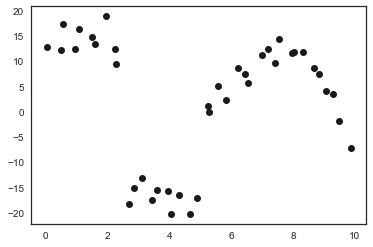

In [161]:
# Write your answer in here

#
# Open our data file which consists of one (x, y) coordinater per line
# separated by whitespace
#
f = open('Datasets/rjmcmc_multi_data.txt', 'r')
lines = f.readlines()

x = []
y = []

for line in lines:
    columns = line.split()

    x.append(float(columns[0]))
    y.append(float(columns[1]))

f.close()

fig = plt.figure()

plt.plot(x, y, 'ko')

plt.show()

**Task 2**. 
In this exercise we assume a polynomial representation for the
    unknown function (red curve) with maximum order 1 and a uniform
    prior PDF, and also sample over the number of partitions and the
    locations of the discontinuities.

Use the 1-D Partition modelling software to generate
    50000 curves and take the mean.  Plot the a) the mean curve, b)
    the posterior PDF of the discontinuity locations and c) the
    posterior PDF of the number of partitions. Your figures should be
    similar to the one below.
  
<img src="../Figures/rjmcmc_multi/ch2-analyse.png" alt="RJMCMC figure" width="400"/>
<img src="../Figures/rjmcmc_multi/ch2-analyse-partcount.png" alt="RJMCMC figure" width="400"/>
Figure (Upper panel) 2-D data set with mean reconstructed model from
    50000 McMC samples; b) (Middel panel) the posterior PDF of the
    location of discontinuities in the data (notice the two peaks); c) (Lower panel)
    the posterior PDF of the number of partitions detected in the
    data.

 

In [ ]:
# Write your answer in here



Looking at the results of the Bayesian sampling try and answer the
    following: How many partitions have been detected ? Where are the
    most likely location of the partition boundaries/discontinuities ?
    Can you see a difference in how well the data is able to detect
    boundaries of each partition ? What would you estimate as the likely
    position and error of the discontinuities ?


**Task 3**.   In the previous example linear polynomials were used in each
    partition. We now increase the maximum order of the polynomial to 5,
    meaning that up to quintic polynomials are used within each
    partition. Plot the same figures as in the
    previous exercise showing a) the mean curve, b) the posterior PDF of
    the discontinuity locations and c) the posterior PDF of the number
    of partitions. See how they have changed at the inference process
    now picks out the discontinuity number and location much better.
    Your figures should be similar to Figure below. Using these
    probabilistic sampling results we might draw different conclusions
    than in Q2, but remember here the maximum polynomial order provided
    as prior information to the Bayesian procedure is different from in
    the previous case.

<img src="../Figures/rjmcmc_multi/ch3-order.png" alt="RJMCMC figure" width="400"/>
<img src="../Figures/rjmcmc_multi/ch3-orderpartcount.png" alt="RJMCMC figure" width="400"/>
Figure. (Top panel) 2-D data set with mean reconstructed model from
    50000 McMC samples, with maximum order of polynomial set to 5; b) 
    (Middle panel) the posterior PDF of the location of discontinuities
    in the data (notice the two peaks); c) (Lower panel) the posterior PDF of the
    number of partitions detected in the
    data.]

In [ ]:
# Write your answer in here


**Task 4**. Repeat the run, only this time use the library routines to plot a
    density model of the entire ensemble of curves and 95% confidence
    intervals at each point along the axes. In this way we get a visual
    impression of the error in the predicted curve. You should
    get a plot similar to Figure below. This gives an indication of the
    confidence in the predictive capability of the ensemble of curves.

<img src="../Figures/rjmcmc_multi/ch4-confidence.png" alt="RJMCMC figure" width="400"/>
<img src="../Figures/rjmcmc_multi/ch4-confidenceintervals.png" alt="RJMCMC figure" width="400"/>
Figure (Upper panel) Grayscale image of probability density of all curves in
    the ensemble when maximum polynomial order equal to 5 inside each
    partition; b) ((Lower panel) 95% (point by point) confidence intervals from
    the ensemble of solutions.]

In [ ]:
# Write your answer in here

#
# This is a callback function which can be passed to rjmcmc routines to sample the curves generated 
# during the analysis
#
sample_x = None
sample_curves = []
sample_i = 0
sample_rate = 250
def sampler_cb(x, y):
    global sample_x, sample_curves, sample_i, sample_rate

    if sample_i == 0:
        sample_x = x

    if sample_i % sample_rate == 0:
        sample_curves.append(y)

    sample_i = sample_i + 1


**Task 5** 
Use the routines to try and estimate
    the standard deviation of the noise in the data. In fact we invert
    for a parameter $\lambda$ which is the ratio of the estimated noise
    (i.e. $\sigma$ in the Likelihood expression above) to the true noise. Plot a histogram of
    the results and see how well the Bayesian sampling is able to
    constrain the level of noise in the data. Your results should be
    similiar to Figure below. If the data were estimated with $\sigma=3$,
    what do you think the true value was ?

<img src="../Figures/rjmcmc_multi/ch5-hierarchical.png" alt="RJMCMC figure" width="400"/>
Figure  Posterior PDF of the data noise parameter λ values found from sampling.

In [ ]:
#
# Set a range of where we think the error should be
#
lambda_min = 0.5
lambda_max = 3.0
lambda_std = 0.1

data.set_lambda_range(lambda_min, lambda_max)
data.set_lambda_std(lambda_std)


----